In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [ ]:
!ls german-traffic-signs #p=pickle to store data

signnames.csv  test.p  train.p	valid.p


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random


Using TensorFlow backend.


In [ ]:
np.random.seed(0) #Each time data will not randomly taken  or data will be taken sequntially


with open('german-traffic-signs/train.p','rb') as f: #we are storing the file as f and rb means read in binary   [read ,write,append] [binary,text]
  train_data=pickle.load(f) #unpickle the train.p file

with open('german-traffic-signs/valid.p','rb') as f:
  val_data=pickle.load(f)

with open('german-traffic-signs/test.p','rb') as f:
  test_data=pickle.load(f)

x_train,y_train=train_data['features'],train_data['labels']
x_val,y_val=val_data['features'],val_data['labels']
x_test,y_test=test_data['features'],test_data['labels']

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
print(x_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [ ]:
assert(x_train.shape[0]==y_train.shape[0]), "The number of images is not equal to no of labels "
assert(x_val.shape[0]==y_val.shape[0]), "The number of images is not equal to no of labels "
assert(x_test.shape[0]==y_test.shape[0]),"The number of images is not equal to no of labels "

assert(x_train.shape[1:]==(32,32,3)), "The dimnesions of the image is not 32X32X3 "
assert(x_val.shape[1:]==(32,32,3)),"The dimnesions of the image is not "
assert(x_test.shape[1:]==(32,32,3)),"The dimnesions of the image is not "

In [ ]:
data=pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

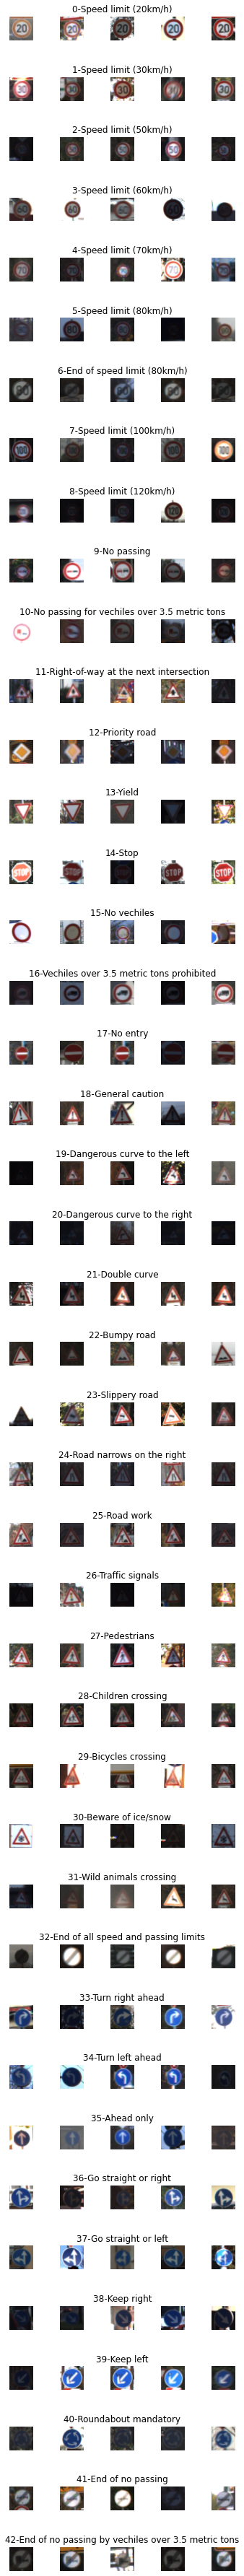

In [ ]:
num_of_samples=[]

cols=5
num_classes=43

fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,50))
fig.tight_layout()
for i in range(cols):
  for j, row in data.iterrows():
    x_selected=x_train[y_train==j]  #finding all the data from same class   
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:],cmap='gray')  #Display 5 randomly selected datas
    axs[j][i].axis('off')
    if i==2:
      axs[j][i].set_title(str(j)+'-'+row['SignName']) #Display Class name as title
      num_of_samples.append(len(x_selected))
      


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

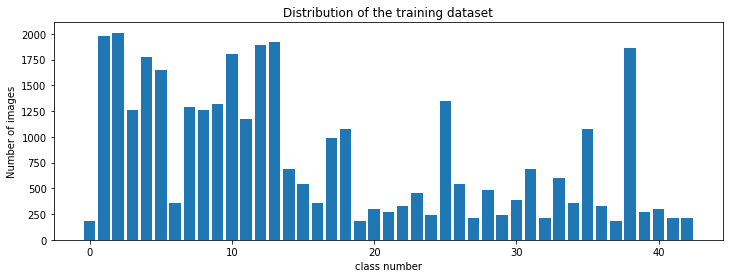

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("class number")
plt.ylabel("Number of images")

(32, 32, 3)
[[[18 18 21]
  [21 20 23]
  [21 19 22]
  ...
  [47 57 69]
  [52 58 65]
  [58 59 62]]

 [[20 20 23]
  [18 18 20]
  [19 18 22]
  ...
  [48 58 71]
  [54 60 67]
  [56 57 59]]

 [[15 15 17]
  [16 16 17]
  [17 17 21]
  ...
  [49 59 72]
  [52 59 67]
  [53 55 59]]

 ...

 [[23 20 21]
  [21 18 19]
  [17 14 16]
  ...
  [20 33 47]
  [30 49 60]
  [49 60 69]]

 [[26 20 21]
  [21 17 15]
  [16 14 15]
  ...
  [17 30 44]
  [27 46 57]
  [43 54 63]]

 [[27 18 19]
  [22 17 17]
  [17 16 18]
  ...
  [15 28 42]
  [25 43 54]
  [35 48 57]]]


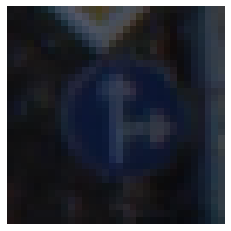

In [ ]:
import cv2
plt.imshow(x_train[1000])
plt.axis('off')
print(x_train[1000].shape)
print(x_train[1000])



(32, 32)


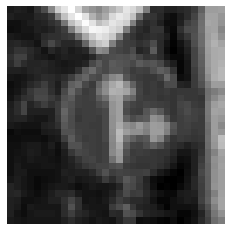

In [ ]:
def grayscale(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img
  

img=grayscale(x_train[1000])
plt.imshow(img,cmap='gray')
plt.axis('off')
print(img.shape)

(32, 32)


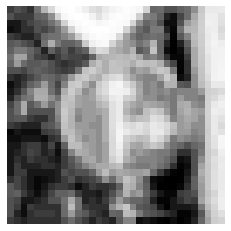

In [ ]:
#histogram-equalisation for brightness standardisation

def equalize(img):
  img=cv2.equalizeHist(img)
  return img

img=equalize(img)
plt.imshow(img,cmap='gray')
plt.axis('off')
print(img.shape)


In [ ]:
def preprocessing(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255 #normalize
  return img

In [ ]:
x_train=np.array(list(map(preprocessing,x_train)))
x_val=np.array(list(map(preprocessing,x_val)))
x_test=np.array(list(map(preprocessing,x_test)))

(34799, 32, 32)


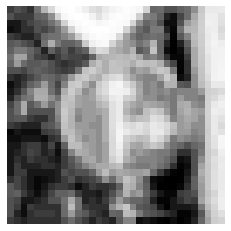

In [ ]:
plt.imshow(x_train[1000],cmap='gray')
plt.axis("off")
print(x_train.shape)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],32,32,1)
x_val=x_val.reshape(x_val.shape[0],32,32,1)
x_test=x_test.reshape(x_test.shape[0],32,32,1)

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [ ]:
#OneHotEncoding labels

y_train=to_categorical(y_train,43)
y_val=to_categorical(y_val,43)
y_test=to_categorical(y_test,43)

In [ ]:
#fit Generator: This is the data augmentation technique

from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(width_shift_range=0.1,
                           height_shift_range=0.1,
                           zoom_range=0.2,
                           shear_range=0.1,
                           rotation_range=10)
datagen.fit(x_train)


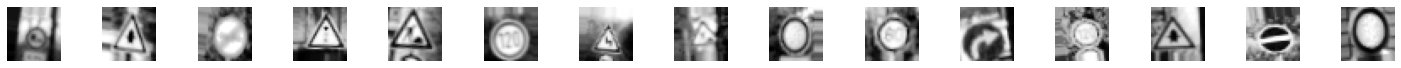

In [ ]:
#calling the datagenerator to augment images in real time

batches=datagen.flow(x_train,y_train,batch_size=20)
x_batch,y_batch=next(batches)
fig,axes=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
  axes[i].imshow(x_batch[i].reshape(32,32),cmap='gray')
  axes[i].axis('off')

In [ ]:
def lenet_model():  #LeNet Model

  model= Sequential()                      
  model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))  #no. of features , feature matrix size 
  model.add(Conv2D(60,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2))) #pooling matrixs size 
                      
  model.add(Conv2D(30,(3,3),activation='relu'))  
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2))) #pooling matrixs size 
  #model.add((Dropout(0.5))  commented out after fit generator

  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model



In [ ]:
model=lenet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)              

In [ ]:
h=model.fit_generator(datagen.flow(x_train,y_train,batch_size=50),
                      steps_per_epoch=2000,epochs=10,
                      validation_data=(x_val,y_val),shuffle=1,
                      verbose=1)

Epoch 1/10
2000/2000 [==============================] - 40s 20ms/step - loss: 0.9028 - accuracy: 0.7368 - val_loss: 0.0936 - val_accuracy: 0.9730
Epoch 2/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.2194 - accuracy: 0.9316 - val_loss: 0.0652 - val_accuracy: 0.9834
Epoch 3/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1489 - accuracy: 0.9543 - val_loss: 0.0317 - val_accuracy: 0.9905
Epoch 4/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1186 - accuracy: 0.9636 - val_loss: 0.0274 - val_accuracy: 0.9914
Epoch 5/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.1020 - accuracy: 0.9690 - val_loss: 0.0242 - val_accuracy: 0.9923
Epoch 6/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.0860 - accuracy: 0.9733 - val_loss: 0.0214 - val_accuracy: 0.9943
Epoch 7/10
2000/2000 [==============================] - 34s 17ms/step - loss: 0.0754 - accuracy: 0.9768 - val_loss: 0.0287 -

In [ ]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.xlabel('epochs')
plt.legend(['training_acc','Val_acc'])
plt.show()

KeyError: ignored

In [ ]:
score=model.evaluate(x_test,y_test,verbose=1)

print('test score: ',score[0])
print('test_accuracy:',score[1])

In [ ]:
#Predict internet Images to test the model

import requests  #Fetching the image or handling the urls
from PIL import Image  #Used to handle the images
url='https://www.rhinocarhire.com/CorporateSite/media/Drive-Smart/Road-Signs/Warning-Signs/Germany-Warning-Sign-Warning-for-a-danger-with-no-specific-traffic-sign.png'
r=requests.get(url, stream=True)
img=Image.open(r.raw)  #To decode into image from bytes
plt.imshow(img,cmap=plt.get_cmap('gray'))


In [ ]:
#Preprocessing image

img=np.asarray(img)
img=cv2.resize(img,(32,32))
img=preprocessing(img)
plt.imshow(img,cmap=plt.get_cmap('gray'))
print(img.shape)


In [ ]:
#Reshape reshape

img=img.reshape(1,32,32,1)
#Test image
print('predicted sign: ',
      data["SignName"][model.predict_classes(img)])